In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
zero_features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = df['Glucose'].count()

for feature in zero_features:
    zero_count = df[df[feature]==0][feature].count()
    print('Number of cases of 0 in {0} is {1}, Percentage is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Number of cases of 0 in Glucose is 5, Percentage is 0.65 %
Number of cases of 0 in BloodPressure is 35, Percentage is 4.56 %
Number of cases of 0 in SkinThickness is 227, Percentage is 29.56 %
Number of cases of 0 in Insulin is 374, Percentage is 48.70 %
Number of cases of 0 in BMI is 11, Percentage is 1.43 %


In [10]:
df_mean = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, df_mean)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

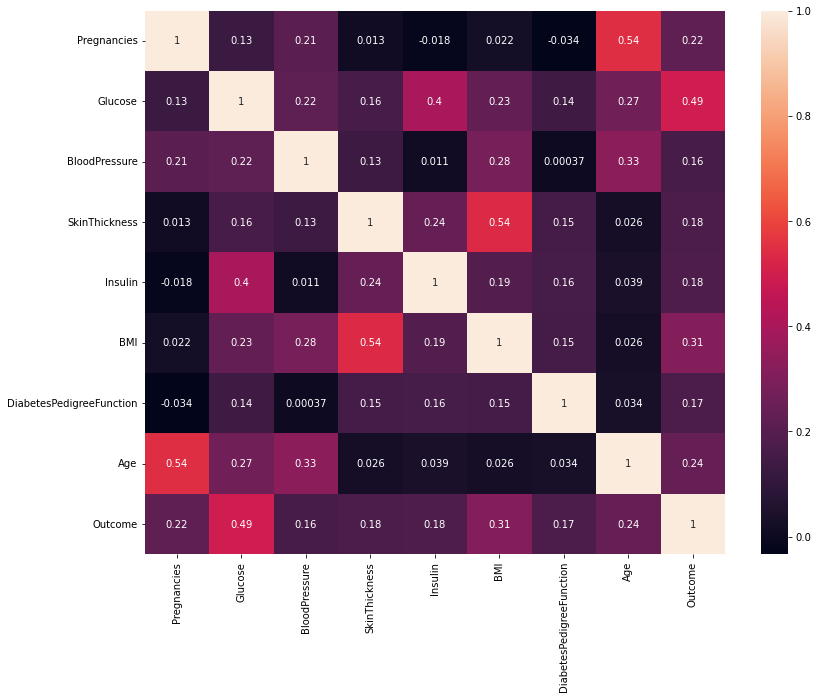

In [12]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot = True)

C:\Users\PREETHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PREETHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


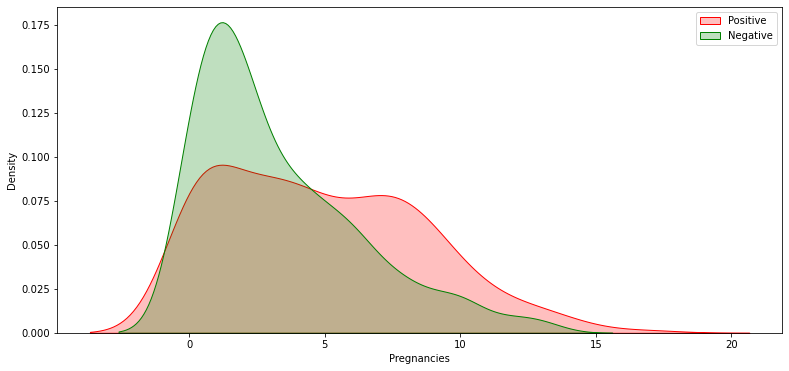

In [13]:
plt.figure(figsize=(13,6))
sns.distplot(df["Pregnancies"][df["Outcome"]==1], color = "red", label = "Positive", kde_kws={'shade' : True}, hist = False)
sns.distplot(df["Pregnancies"][df["Outcome"]==0], color = "green", label = "Negative", kde_kws={'shade' : True}, hist = False)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


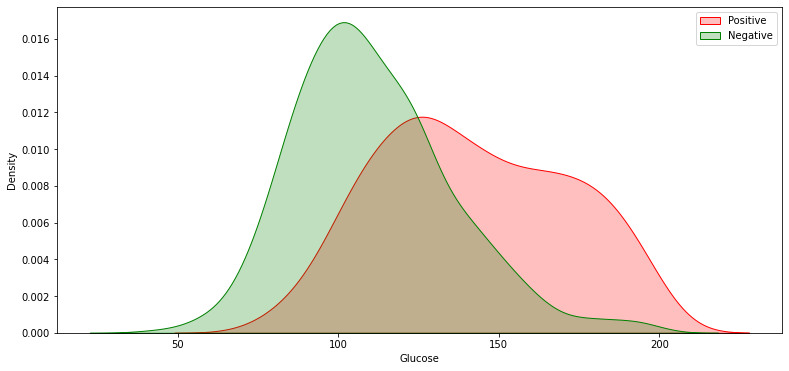

In [16]:
plt.figure(figsize=(13,6))
sns.distplot(df["Glucose"][df["Outcome"]==1], color = "red", label = "Positive", kde_kws={'shade': True}, hist = False)
sns.distplot(df["Glucose"][df["Outcome"]==0], color = "green", label = "Negative", kde_kws={'shade': True}, hist = False)
plt.legend()

C:\Users\PREETHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PREETHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


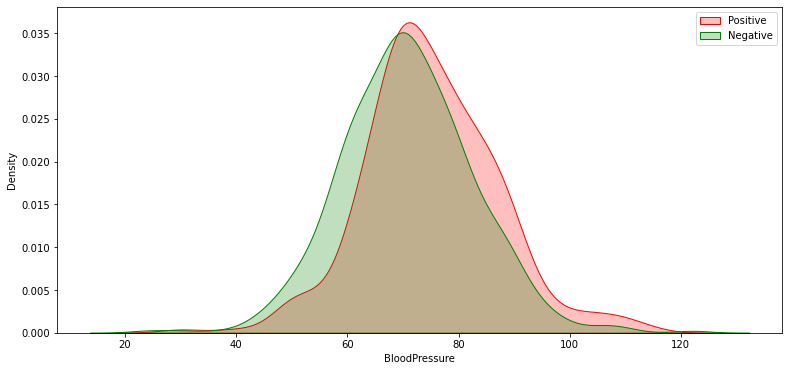

In [14]:
plt.figure(figsize=(13,6))
sns.distplot(df["BloodPressure"][df["Outcome"]==1],color="red",label="Positive", kde_kws={'shade': True}, hist = False)
sns.distplot(df["BloodPressure"][df["Outcome"]==0],color="green",label="Negative", kde_kws={'shade': True}, hist = False)
plt.legend()

C:\Users\PREETHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PREETHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


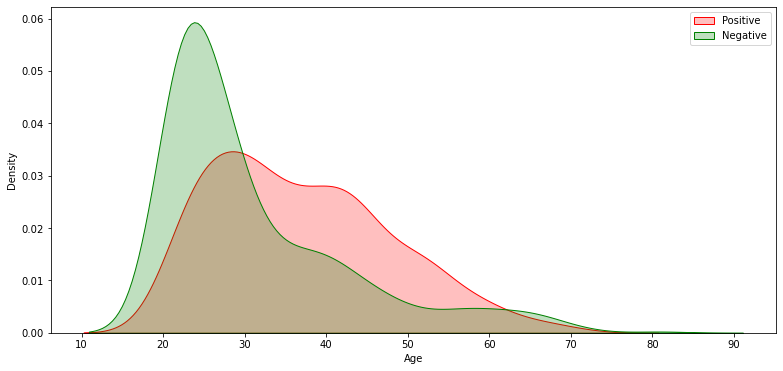

In [15]:
plt.figure(figsize=(13,6))
sns.distplot(df["Age"][df["Outcome"]==1],color="red",label="Positive", kde_kws={'shade': True}, hist = False)
sns.distplot(df["Age"][df["Outcome"]==0],color="green",label="Negative", kde_kws={'shade': True}, hist = False)
plt.legend()

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

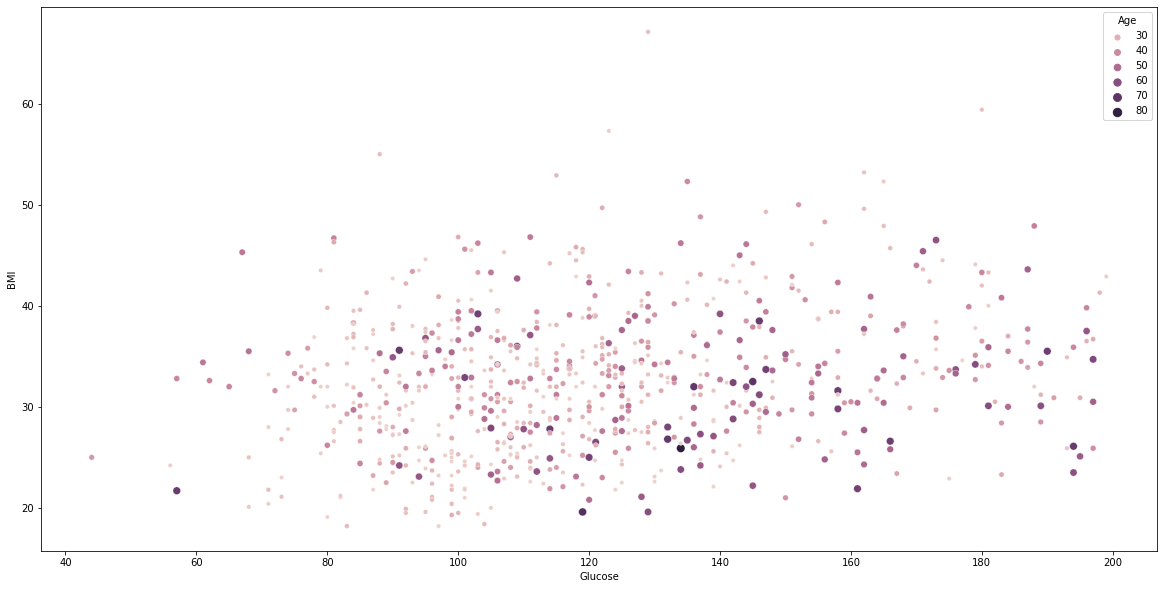

In [16]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

Text(0.5, 6.79999999999999, 'Outcome')

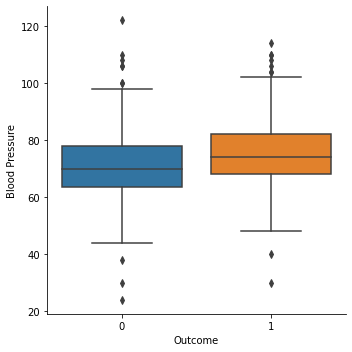

In [17]:
sns.catplot(y="BloodPressure",x="Outcome",data=df,kind="box")
plt.ylabel("Blood Pressure")
plt.xlabel("Outcome")

Text(0.5, 6.79999999999999, 'Outcome')

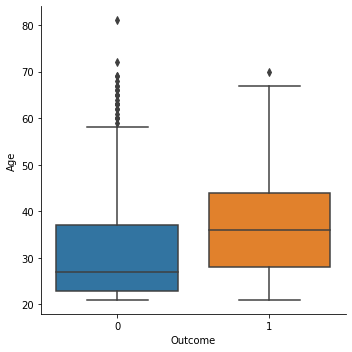

In [18]:
sns.catplot(y="Age",x="Outcome",data=df,kind="box")
plt.ylabel("Age")
plt.xlabel("Outcome")

Text(0.5, 6.79999999999999, 'Outcome')

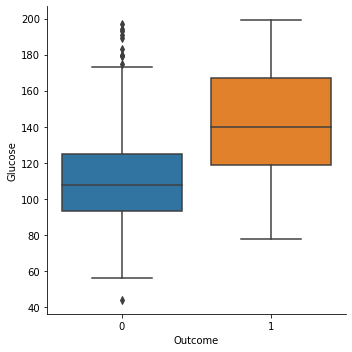

In [19]:
sns.catplot(y="Glucose",x="Outcome",data=df,kind="box")
plt.ylabel("Glucose")
plt.xlabel("Outcome")

Text(0.5, 6.79999999999999, 'Outcome')

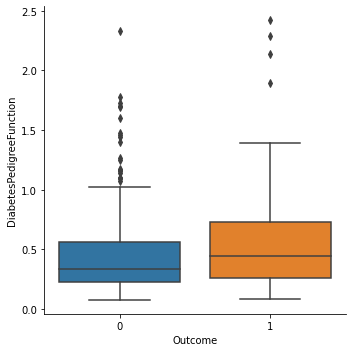

In [20]:
sns.catplot(y="DiabetesPedigreeFunction",x="Outcome",data=df,kind="box")
plt.ylabel("DiabetesPedigreeFunction")
plt.xlabel("Outcome")

In [21]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        outlier_indices.extend(outlier_list_col)
        
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   


outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

        

In [22]:
df.loc[outliers_to_drop]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180.0,78.0,63.0,14.0,59.4,2.42,25,1


In [23]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)

In [24]:
X = df.drop(columns = 'Outcome', axis = 1)  # axis will be 1 as we are dropping the column
Y = df['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [25]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 767, dtype: int64

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify = Y, random_state = 0)


In [27]:
print(X.shape, X_train.shape, X_test.shape)

(767, 8) (613, 8) (154, 8)


In [28]:
logreg = LogisticRegression(solver='lbfgs', max_iter = 1000)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
lg_accuracy = round(accuracy_score(y_pred, Y_test), 2)*100
lg_accuracy

77.0

In [29]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_pred, Y_test), 2)*100
knn_accuracy

73.0

In [30]:
classifier = RandomForestClassifier(n_estimators=6, criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
rf_accuracy = round(accuracy_score(y_pred, Y_test), 2)*100
rf_accuracy

81.0

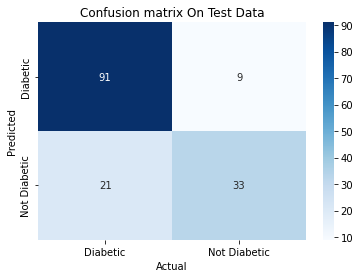

In [31]:
cm = confusion_matrix(Y_test, y_pred)
new_cm = pd.DataFrame(cm , index = ['Diabetic','Not Diabetic'] , columns = ['Diabetic','Not Diabetic'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Diabetic','Not Diabetic'], yticklabels = ['Diabetic','Not Diabetic'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.9 KB


In [33]:
input_data = [[0, 137, 40, 35, 168, 43.1, 2.288, 33]]

prediction = classifier.predict(input_data)

if(prediction[0] == 1):
    print("\nYou are Diabetic")
else:
    print("\nYou are NOT Diabetic")


You are Diabetic


C:\Users\PREETHAM\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
